“The goal is to turn data into information, and information into insight.”

In [37]:
# Import packages necessary for Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import datetime

In [38]:
pd.set_option('display.max_columns', None)
data_train = pd.read_excel(r'C:\Users\emaurkj\Desktop\Daily\dataset\Flight_Ticket_Participant\Data_Train.xlsx')
data_test = pd.read_excel(r'C:\Users\emaurkj\Desktop\Daily\dataset\Flight_Ticket_Participant\Test_set.xlsx')

In [39]:
data_train.shape

(10683, 11)

In [40]:
print(data_train.Price.head())

# Concatenate training and test sets 


data =pd.concat([data_train.drop(['Price'], axis=1), data_test])

print(data.head())

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info  
1    05:50         13:15   7h 25m     2 stops         No info  
2    09:25  04:25 10 Jun      19h     2 stops         No info  
3    18:05         23:30   5h 25m      1 stop         No info  
4    16:50         21:35   4h 45m      1 stop         No info  


In [41]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [42]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
Airline            13354 non-null object
Date_of_Journey    13354 non-null object
Source             13354 non-null object
Destination        13354 non-null object
Route              13353 non-null object
Dep_Time           13354 non-null object
Arrival_Time       13354 non-null object
Duration           13354 non-null object
Total_Stops        13353 non-null object
Additional_Info    13354 non-null object
dtypes: object(10)
memory usage: 1.1+ MB


In [44]:
data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354
unique,12,44,5,6,132,223,1451,374,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,4746,633,5682,5682,3000,288,536,672,7056,10493


In [9]:
data = data.drop_duplicates()

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
dtype: int64

In [11]:
data = data.drop(data.loc[data['Route'].isnull()].index)

In [12]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

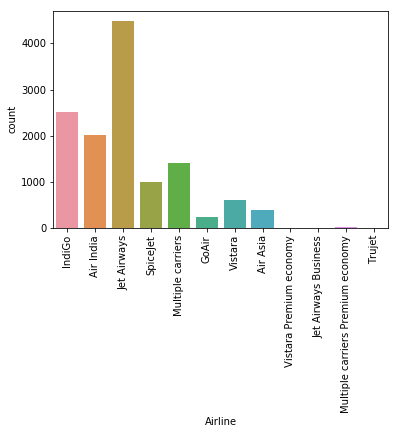

In [13]:
import seaborn as sns

sns.countplot(x='Airline',data=data)
plt.xticks(rotation=90)

In [14]:
data.Airline.value_counts(sort=True).head()

Jet Airways          4485
IndiGo               2519
Air India            2019
Multiple carriers    1414
SpiceJet             1008
Name: Airline, dtype: int64

In [15]:
data['Airline'] =np.where(data['Airline']=='Vistara Premium economy', 'Vistara',data['Airline'])
data['Airline'] = np.where(data['Airline']=='Jet Airways Business','Jet Airways',data['Airline'])
data['Airline']= np.where(data['Airline']=='Multiple carriers Premium economy','Multiple carriers',data['Airline'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

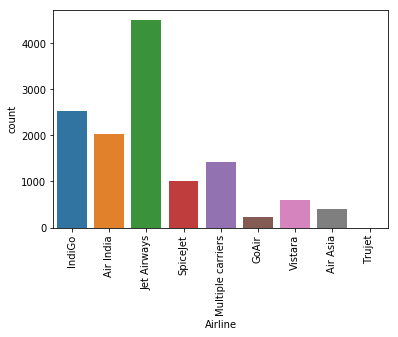

In [16]:
sns.countplot(x='Airline',data=data)
plt.xticks(rotation=90)

In [17]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [18]:
data['Destination']=np.where(data['Destination']=='New Delhi','Delhi',data['Destination'])

# Date of Journey
    We check this column, data['Date_of_Journey'] and find that the column is in this format:-

In [19]:
data.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

This is just raw data. Our model cannot understand it, as it fails to give numerical value. To extract useful features from this column, we would like to convert it into weekdays and months.

In [20]:
data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'])
data['Date_of_Journey'].head()

0   2019-03-24
1   2019-01-05
2   2019-09-06
3   2019-12-05
4   2019-01-03
Name: Date_of_Journey, dtype: datetime64[ns]

In [21]:
# And then to get weekdays from it

data['day_of_week']= data['Date_of_Journey'].dt.day_name()

data['day_of_week'].head(10)

0      Sunday
1    Saturday
2      Friday
3    Thursday
4    Thursday
5      Monday
6     Tuesday
7    Thursday
8     Tuesday
9      Monday
Name: day_of_week, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

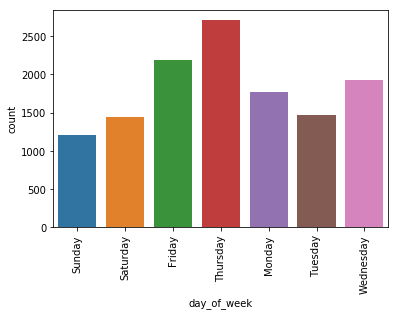

In [22]:
sns.countplot(x=data['day_of_week'], data=data)

plt.xticks(rotation=90)

In [23]:
# And from Date_of_Journey, we will also get the month.

data['Journey_Month'] =pd.to_datetime(data.Date_of_Journey,format ='%d/%m/%Y').dt.month_name()
data['Journey_Month'].head()

0        March
1      January
2    September
3     December
4      January
Name: Journey_Month, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

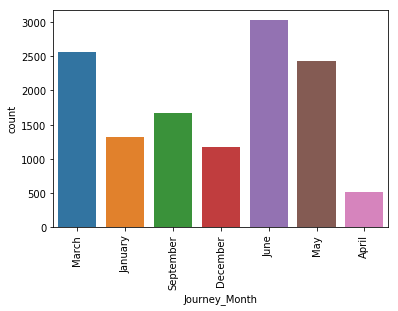

In [24]:
sns.countplot(x=data['Journey_Month'],data=data)
plt.xticks(rotation=90)

# Departure Time of Airlines
The time of departure is in 24 hours format(22:20), we would like to bin it to get insights.
We will create fixed-width bins, each bin contains a specific numeric range. Generally, these ranges are manually set, with a fixed size. Here, I have decided to group hours into 4 bins. [0–5], [6–11], [12–17] and [18–23] are the 4 bins. We cannot have large gaps in the counts because it may create empty bins with no data. This problem is solved by positioning the bins based on the distribution of the data.

In [25]:
data['Departure_t'] =pd.to_datetime(data.Dep_Time, format='%H:%M')

a = data.assign(dept_session=pd.cut(data.Departure_t.dt.hour,
[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening']))

data['Departure_S']= a['dept_session']

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

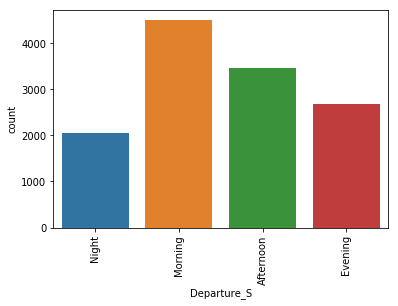

In [26]:
sns.countplot(x=data['Departure_S'],data=data)
plt.xticks(rotation=90)

We fill the null values with “night” in the ‘Departure_S’ column.

# Duration
Our duration column had time written in this format 2h 50m . To help machine learning algorithm derive useful insights, we will convert this text into numeric.

In [27]:
duration = list(data['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
data['Duration_hours'] = dur_hours
data['Duration_minutes'] =dur_minutes
data.loc[:,'Duration_hours'] *= 60
data['Duration_Total_mins']= data['Duration_hours']+data['Duration_minutes']


The result we will now get is continuous in nature.

After visualizing data, it makes sense to delete rows which duration less than 60 mins.

In [28]:
# Get names of indexes for which column Age has value 30
indexNames = data[data.Duration_Total_mins < 60].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

We will drop the columns which had noise or had texts, which would not help our model. We have transformed these into newer columns to get better insights.

In [29]:
data.drop(labels = ['Arrival_Time','Dep_Time','Date_of_Journey','Duration','Departure_t','Duration_hours','Duration_minutes'], axis=1, inplace = True)

# Dummy Variables
We have engineered almost all the features. We have dealt with missing values, binned numerical data, and now it’s time to transform all variables into numeric ones. We will use, get_dummies() to the transformation.

In [50]:
cat_vars = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'day_of_week', 'Journey_Month', 'Departure_S' ]
for var in cat_vars:
    cat_list ='var'+'_'+var
    cat_list =pd.get_dummies(data[var],prefix=var)
    data1 =data.join(cat_list)
    data =data1
    
data_var = data.columns.values.tolist()
to_keep =[i for i in data_var if i not in cat_vars ]

data_final = data[to_keep]

MemoryError: 